In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
#컨테이너에 동일한 값의 자료가 몇 개인지를 파악하는데 사용하는 객체
from IPython.core.display import display, HTML
#display: Public API for display tools in IPython.
#display.display: Display a Python object in all frontends.
#By default all representations will be computed and sent to the frontends. 
#Frontends can decide which representation is used and how.
#display.HTML: Create a display object given raw data.
# When this object is returned by an expression or passed to the display function, 
# it will result in the data being displayed in the frontend. The MIME type of the 
# data should match the subclasses used, so the Png subclass should be used for 
# ‘image/png’ data. If the data is a URL, the data will first be downloaded and 
# then displayed. 
sns.set_style('darkgrid')

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

#Data Exploration

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Our target varaible 'MEDV' is not included in the dataset. Let's add 'MEDV' to the dataset.

In [ ]:
dataset['MEDV'] = boston_dataset.target

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There is no null values in our dataset.

#Data Splitting

In [ ]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values.reshape(-1, 1)
#한 개의 column row는 column수에 따라 알아서 지정

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
pd.DataFrame(y)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [ ]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (354, 13)
Shape of X_test: (152, 13)
Shape of y_train: (354, 1)
Shape of y_test: (152, 1)


#Data Visualization

fig and ax

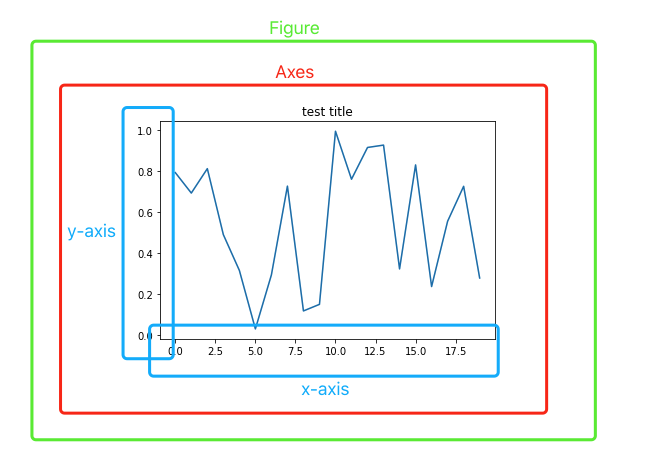

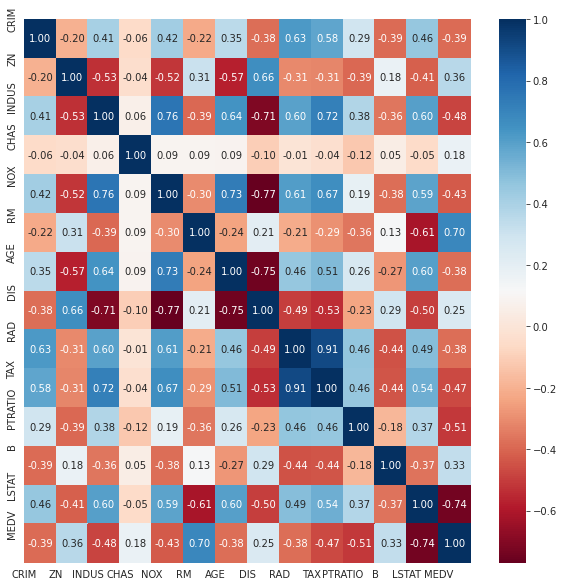

In [ ]:
corr = dataset.corr()

fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(corr, cmap = 'RdBu', annot = True, fmt = '.2f')
#각 셀에 상관계수를 보여주는데 소수점 둘째 자리까지 보여줘라
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
#heatmap은 기본적으로 x측 y축에 column 
plt.show()

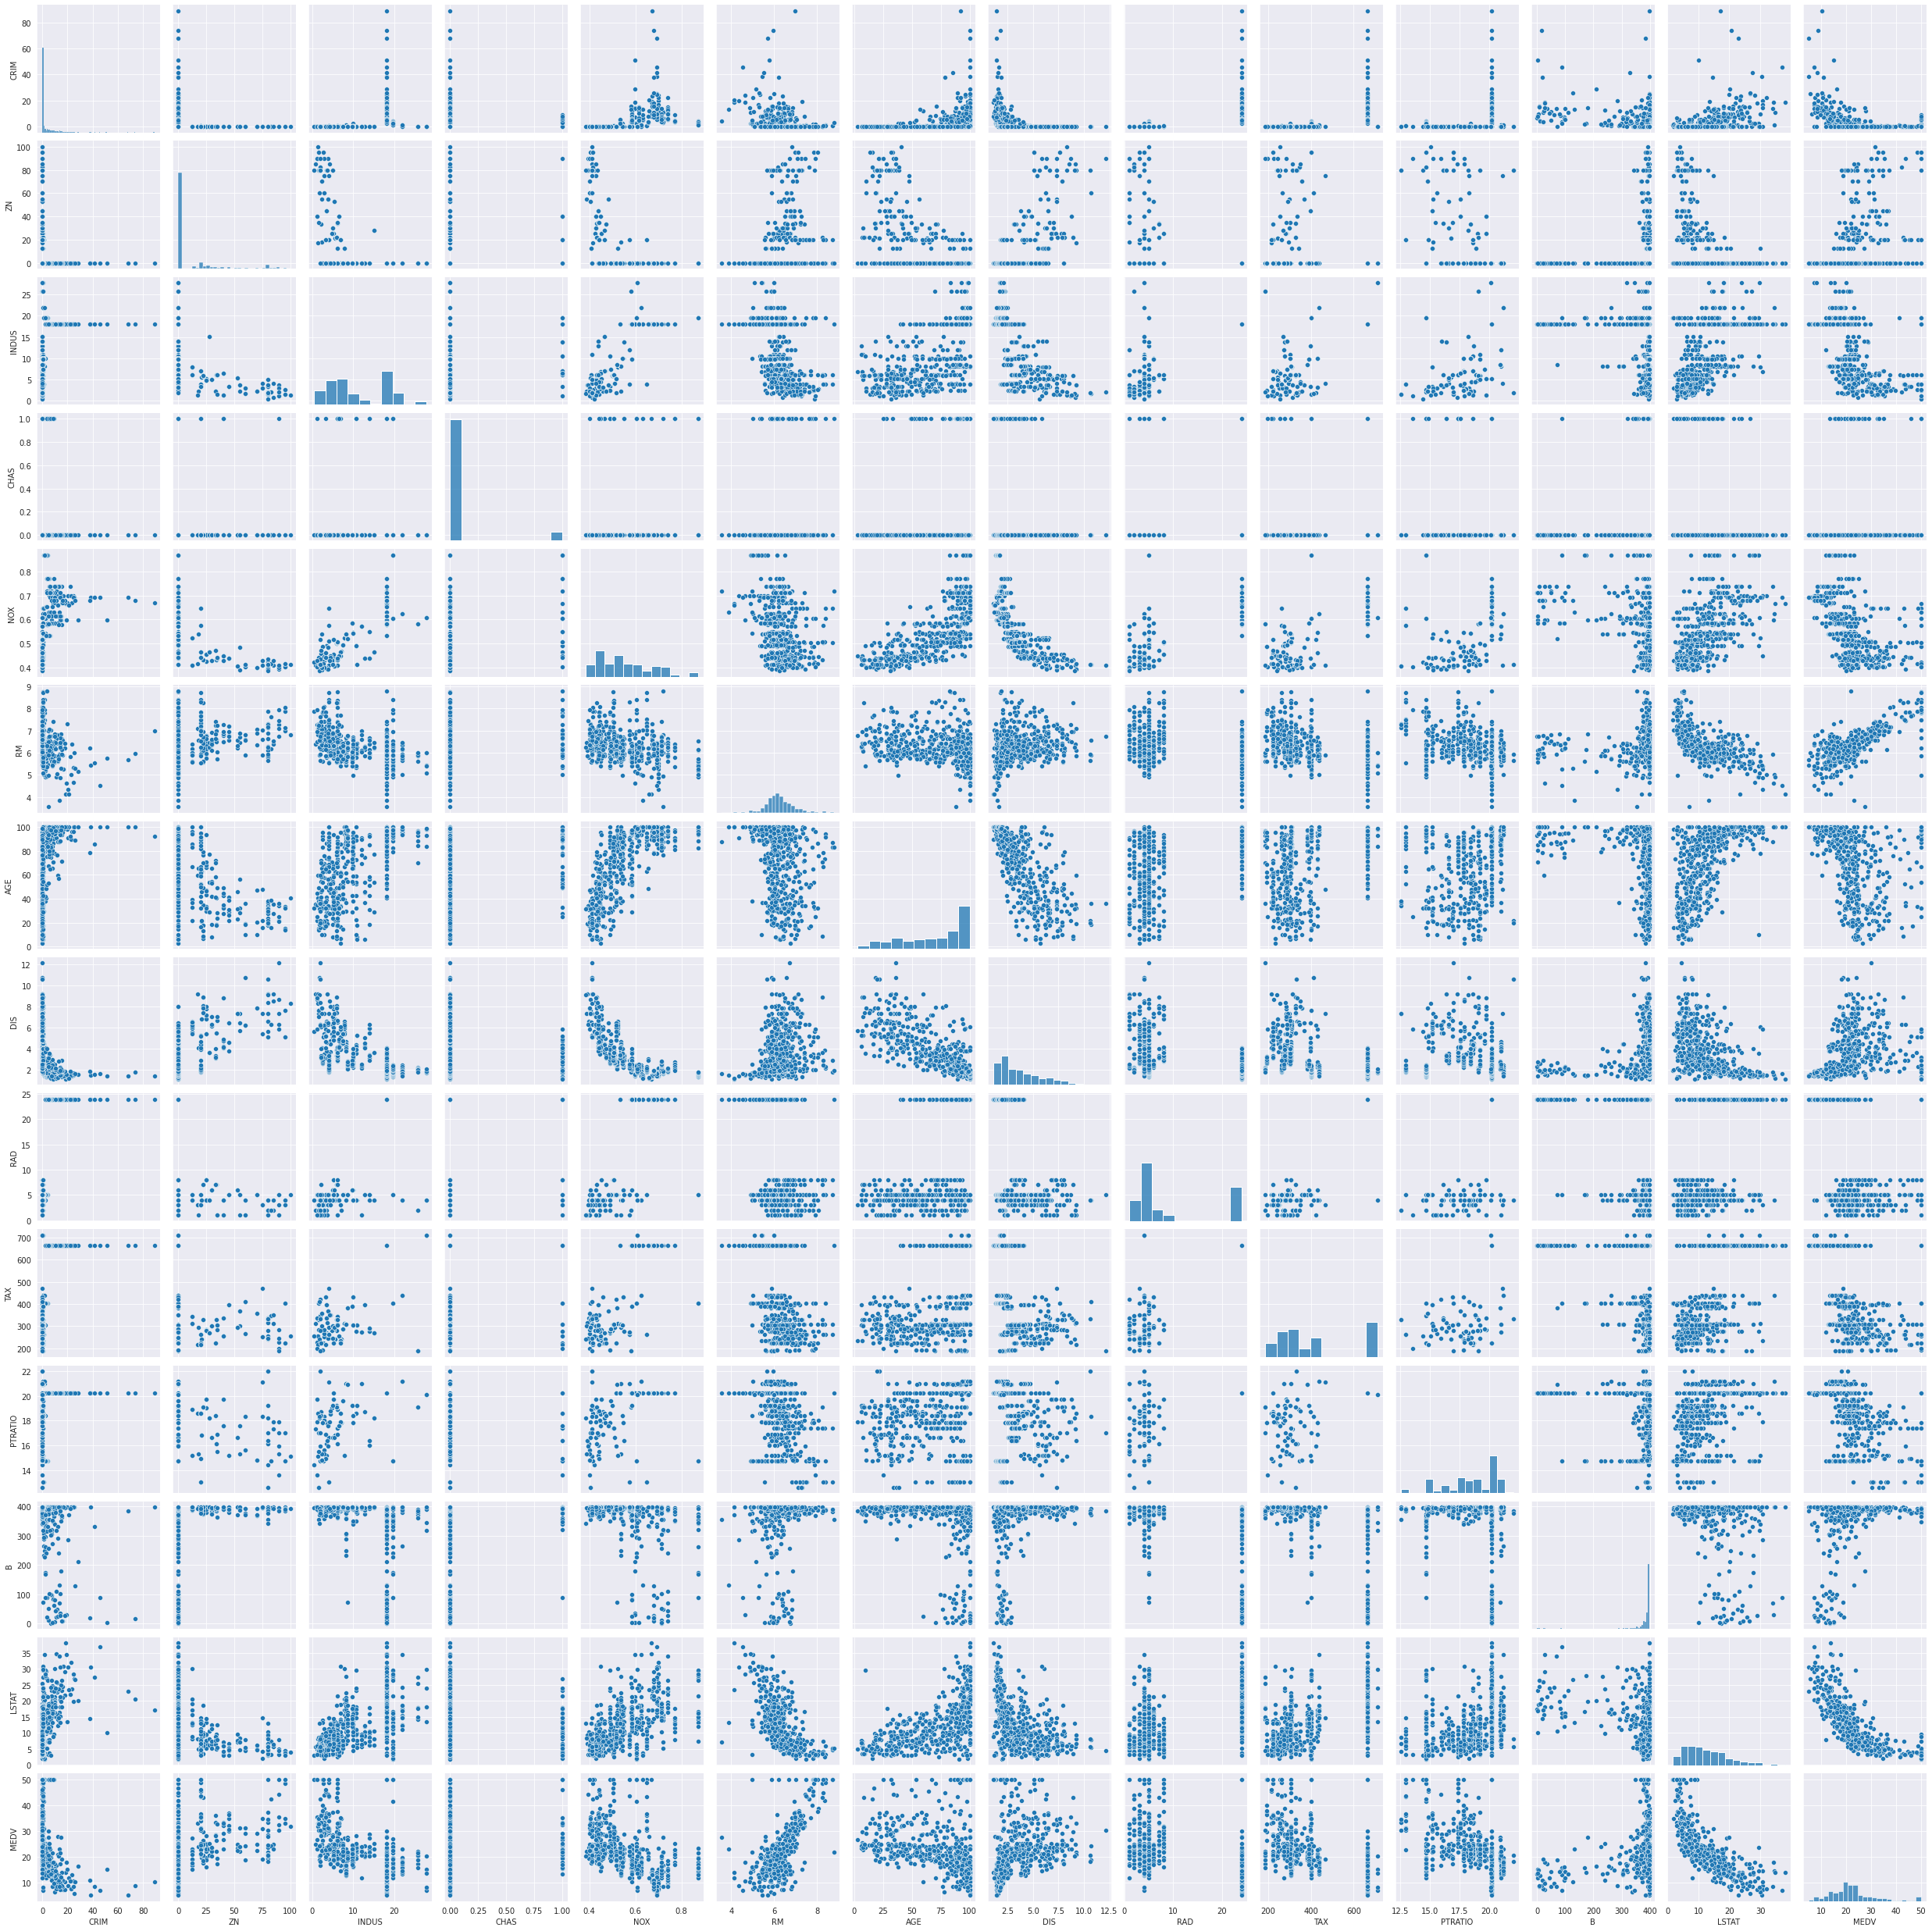

In [ ]:
sns.pairplot(dataset)
plt.show()

#Model Selections

##Linear Regession

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

cv_linear = cross_val_score(estimator = lin_reg, X = X_train, y = y_train, cv = 10)

y_pred_linear_train = lin_reg.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = lin_reg.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))
print('CV:', cv_linear.mean())
print('R2_score(train):', r2_score_linear_train)
print('R2_score(test):', r2_score_linear_test)
print('RMSE:', rmse_linear)

CV: 0.6984854476156042
R2_score(train): 0.7435787589010061
R2_score(test): 0.7133593313710349
RMSE: 4.647279745724213


##Polynomial Regression(2nd degree)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
#질문: 이건 왜 하는 건지
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)
#질문: X에 X_poly해야되는 거 아닌지
#default: scoring = accuracy
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

rmse_poly2 = np.sqrt(mean_squared_error(y_test, y_pred_poly2_test))

print('CV:', cv_poly2.mean())
print('R2_score (train):', r2_score_poly2_train)
print('R2_score (test):', r2_score_poly2_test)
print('RMSE:', rmse_poly2)

CV: 0.6984854476156042
R2_score (train): 0.9306558489083436
R2_score (test): 0.7665134369454242
RMSE: 4.194313207139797


In [ ]:
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_poly, y = y_train, cv = 10)
#X_train말고 X_poly넣어서 해봄
#cross_val_score이 낮아졌음
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

rmse_poly2 = np.sqrt(mean_squared_error(y_test, y_pred_poly2_test))

print('CV:', cv_poly2.mean())
print('R2_score (train):', r2_score_poly2_train)
print('R2_score (test):', r2_score_poly2_test)
print('RMSE:', rmse_poly2)

CV: 0.5791788972202103
R2_score (train): 0.9306558489083436
R2_score (test): 0.7665134369454242
RMSE: 4.194313207139797


##Ridge Regression

기존 모델에 ridge regression을 하는 것이 아닌 2nd degree polynomial에 ridge regression을 한 것


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [('scalar', StandardScaler()),
         ('poly', PolynomialFeatures(degree = 2)),
         ('model', Ridge(alpha = 3.8, fit_intercept = True))]
#fit_intercept: 모형에 상수항이 있는가 없는가, 있으면 true

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=3.8))])

In [ ]:
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, 
                           y = y_train.ravel(), cv = 10)
#ravel = 다차원 array를 1차원으로 바꾸는 것
#여기서만 1차원 배열로 왜 바꾸어주는 것인지

y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.7635629962138696
R2_score (train):  0.9228176586388414
R2_score (test):  0.891965455298589
RMSE:  2.8530621664437565


##Lasso Regression

기존 모델에 ridge regression을 하는 것이 아닌 2nd degree polynomial에 lasso regression을 한 것

In [ ]:
from sklearn.linear_model import Lasso

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree = 2)),
    ('model', Lasso(alpha = 0.012, fit_intercept = True, max_iter = 3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.012, max_iter=3000))])

In [ ]:
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.7505443182491558
R2_score (train):  0.9234017201921203
R2_score (test):  0.8950938075525039
RMSE:  2.8114507112289018


##Support Vector Regression

In [ ]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1, 1))

In [ ]:
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf', gamma = 'scale')
regressor_svr.fit(X_scaled, y_scaled.ravel())

SVR()

In [ ]:
from sklearn.metrics import r2_score

cv_svr = cross_val_score(estimator = regressor_svr, X = X_scaled, y = y_scaled.ravel(), cv = 10)

y_pred_svr_train = sc_y.inverse_transform(regressor_svr.predict(X_scaled).reshape(-1, 1))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)
#inverse_transform: scale back the data to original representation
#에러 고침: inverse_transform expects 2D data => solved using reshape(-1, 1)
y_pred_svr_test = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)).reshape(-1, 1))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)
#에러 고침: inverse_transform expects 2D data => solved using reshape(-1, 1)
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)

CV:  0.782600693247584
R2_score (train):  0.8742715669147498
R2_score (test):  0.8044070157723574
RMSE:  3.8388977809328355


##Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
from sklearn.metrics import r2_score

cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.6177422304890111
R2_score (train):  1.0
R2_score (test):  0.5989917396644069
RMSE:  5.496757417356451


overfitting이 심한 것으로 보임

##Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())
#이것도 갑자기 ravel 왜 하는지 안해도 결과에는 큰 차이 없음

RandomForestRegressor(n_estimators=500, random_state=0)

In [ ]:
from sklearn.metrics import r2_score

cv_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train.ravel(), cv = 10)
#왜 갑자기 cross validation score를 구하는데에만 X_train이 아닌 X_scaled를 쓰는지
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8182509664876496
R2_score (train):  0.9768407108850092
R2_score (test):  0.8637486208767902
RMSE:  3.204057971213175


#Evaluating the models

In [ ]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 
                                               'R2_Score(training)', 
                                               'R2_Score(test)', 
                                               'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,4.647280,0.743579,0.713359,0.698485
1,Polynomial Regression (2nd),4.194313,0.930656,0.766513,0.579179
2,Ridge Regression,2.853062,0.922818,0.891965,0.763563
3,Lasso Regression,2.811451,0.923402,0.895094,0.750544
4,Support Vector Regression,3.838898,0.874272,0.804407,0.782601
5,Decision Tree Regression,5.496757,1.000000,0.598992,0.617742
6,Random Forest Regression,3.204058,0.976841,0.863749,0.818251


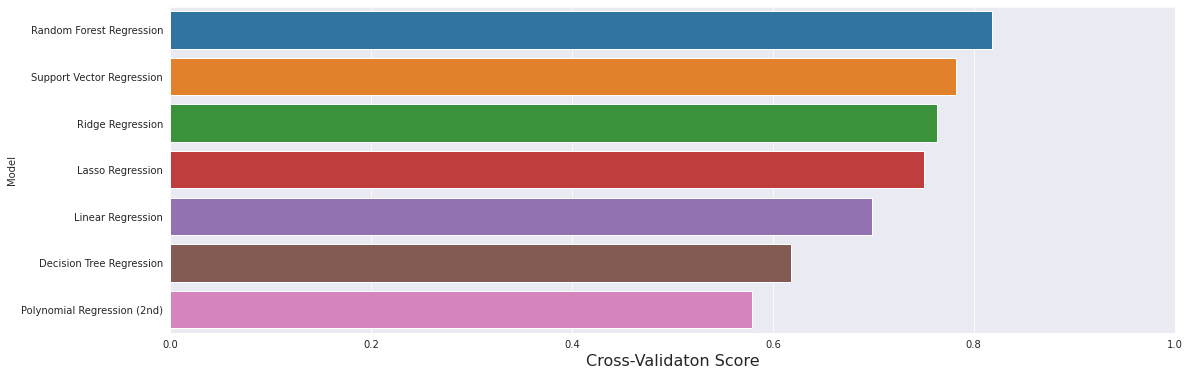

In [ ]:
f, axe = plt.subplots(1,1, figsize = (18,6))

predict.sort_values(by = ['Cross-Validation'], ascending = False, inplace = True)
#내림차순으로 정렬 후 predict에도 적용
sns.barplot(x = 'Cross-Validation', y = 'Model', data = predict, ax = axe)
axe.set_xlabel('Cross-Validaton Score', size = 16)
axe.set_ylabel('Model')
axe.set_xlim(0, 1.0)
plt.show()

Random Forest Regressor has the largest CV score.

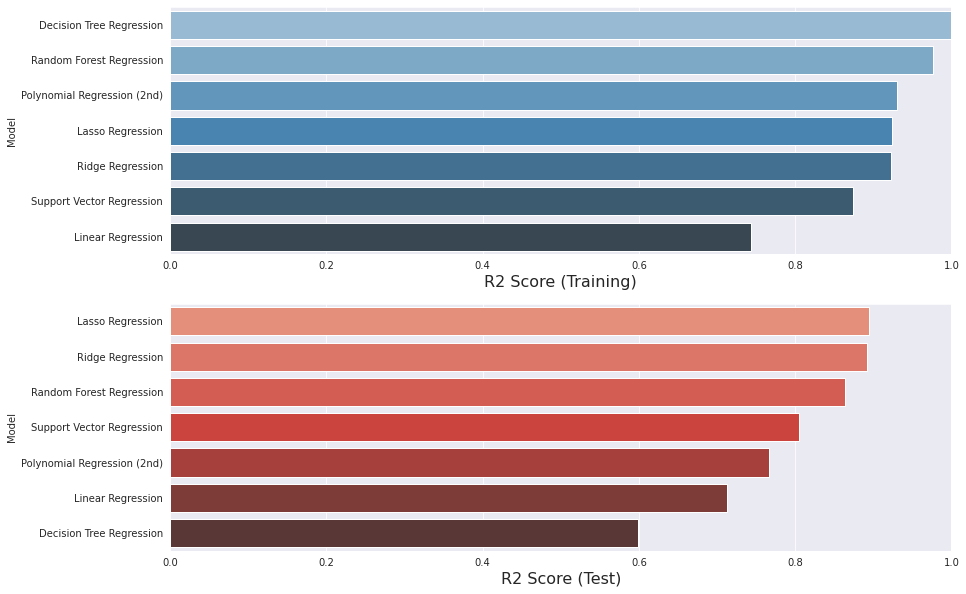

In [ ]:
f, axes = plt.subplots(2, 1, figsize = (14,10))
#2행 1열의 Plot

predict.sort_values(by=['R2_Score(training)'], ascending = False, inplace = True)

sns.barplot(x = 'R2_Score(training)', y = 'Model', data = predict, palette = 'Blues_d', ax = axes[0])

axes[0].set_xlabel('R2 Score (Training)', size = 16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
#첫번째 plot에 대한 설정
predict.sort_values(by = ['R2_Score(test)'], ascending = False, inplace = True)

sns.barplot(x='R2_Score(test)', y = 'Model', data = predict, palette='Reds_d', ax = axes[1])

axes[1].set_xlabel('R2 Score (Test)', size = 16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
#두번째 plot에 대한 설정
plt.show()

Lasso Regression has the biggest R2 score with test data, and the difference between R2 Score(Training) and (Test) seems to be very small.

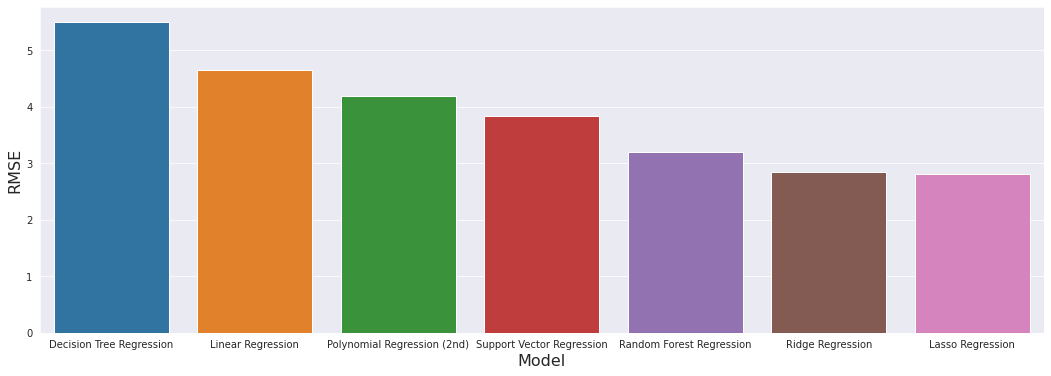

In [ ]:
predict.sort_values(by=['RMSE'], ascending = False, inplace = True)

f, axe = plt.subplots(1, 1, figsize = (18, 6))
sns.barplot(x = 'Model', y = 'RMSE', data = predict, ax = axe)
axe.set_xlabel('Model', size = 16)
axe.set_ylabel('RMSE', size = 16)

plt.show()

Lasso Regression has the smallest RMSE.